In [1]:
import numpy as np
import pandas as pd
from classification import process,compare_model,create_model,predict_model

In [2]:
df = pd.read_csv('income_pre.csv')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K


In [3]:
y = df['income']
X = df.drop(columns=['income'])

X_train, X_test, y_train, y_test = process(X, y,
                                           test_size=0.33,
                                           poly=2,
                                           normalize_method='zscore',
                                           fix_imbalance=True
                                          )

In [4]:
compare_model(X_train, y_train,fold=5)

,Model,Accuracy,Recall,Prec,F1,TT (Sec)
lr,Logistic Regression,0.805768,0.852566,0.725458,0.763899,11.629833
dt,Decision Tree Classifier,0.851309,0.796187,0.765294,0.777296,2.159909
nb,Naive Bayes,0.774881,0.916705,0.638845,0.728327,0.284110
gbc,Gradient Boosting Classifier,0.848465,0.860845,0.754383,0.794188,48.386662
rf,Random Forest Classifier,0.889194,0.857271,0.800836,0.825617,20.282794
xgboost,Extreme Gradient Boosting,0.899211,0.851737,0.810672,0.829545,22.173204
lightgbm,Light Gradient Boosting Machine,0.889406,0.862589,0.794617,0.824445,3.624789


In [5]:
model = create_model(X_train, y_train,fold=10,md_name='xgboost')

,Accuracy,Recall,Prec,F1
Fold,,,,
0,0.850832,0.778319,0.672632,0.721626
1,0.867171,0.790464,0.698448,0.741613
2,0.867171,0.760897,0.712121,0.735701
3,0.864750,0.781170,0.690664,0.733134
4,0.868079,0.776529,0.707622,0.740476
5,0.863238,0.740148,0.713777,0.726723
6,0.921029,0.932440,0.922652,0.927520
7,0.981241,0.981241,1.000000,0.990531
8,0.980024,0.980024,1.000000,0.989911


              precision    recall  f1-score   support

           0       0.92      0.89      0.91      8196
           1       0.68      0.75      0.71      2550

    accuracy                           0.86     10746
   macro avg       0.80      0.82      0.81     10746
weighted avg       0.86      0.86      0.86     10746



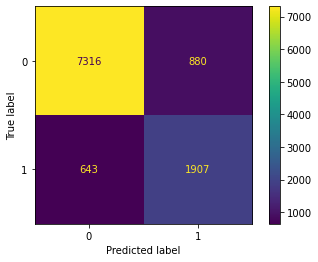

In [6]:
predict_model(X_test, y_test,model)